In [ ]:
# Problem 1 A)
# TODO: Finish doc-strings
# TODO: use get_interpolated_values

#x- implement lagrange interpolation
#x- test on equidistant nodes
#x- test on chebishev nodes
#x- generalise the method based on chebishev nodes
#x- use the runge function on [-5, 5]

def create_lagrange_basis(x:np.float, x_int: np.array, pos: int):
    """
    :param x:
    :param x_int:
    :param pos:
    :return:
    """
    fraction = lambda node:(x-x_int[node])/(x_int[pos]-x_int[node])
    return np.prod(np.array([fraction(node) for node in range(x_int.shape[0]) if node!=pos]))


def create_lagrange_pol(x_int: np.array, y_int:np.array):
    """
    :param x:
    :param y:
    :return:
    """
    return lambda x: np.sum([create_lagrange_basis(x, x_int, pos)*y_int[pos] for pos in range(x_int.shape[0])])

def get_interpolated_values(x_int: np.array, y_int:np.array, x)->np.array:
    return np.array([create_lagrange_pol(x_int, y_int)(x_val) for x_val in x])


def runge_function(x:float)->float:
    return 1/(np.power(x, 2)+1)

def generate_chebyshev_nodes(a:float, b:float, n:int)->np.array:
    nodes = []
    for i in range(1, n+1):
        nodes.append(0.5*(a+b)+0.5*(b-a)*math.cos((2*i-1)*math.pi/(2*n)))
    return np.array(nodes)

def show_interpolation(lagrange_pol, a:float, b:float, name:str):
    x = np.linspace(a, b, 100)
    y = runge_function(x)
    plt.plot(x, y, label="Runge function")
    plt.plot(x, np.array([lagrange_pol(x[pos]) for pos in range(x.shape[0])]), label=name)
    plt.title("Lagrange interpolation")
    plt.grid()
    plt.legend()
    plt.show()

a, b = -1, 1
nodes = 10
x_int = np.linspace(a, b, nodes)
y_int = runge_function(x_int)
lagrange_pol = create_lagrange_pol(x_int, y_int)
show_interpolation(lagrange_pol, a, b, "equidistant nodes")

x_int = generate_chebyshev_nodes(a, b, nodes)
y_int = runge_function(x_int)
lagrange_pol = create_lagrange_pol(x_int, y_int)
show_interpolation(lagrange_pol, -1, 1, "Chebyshev nodes")

a, b = -5, 5
x_int = np.linspace(a, b, nodes)
y_int = runge_function(x_int)
lagrange_pol = create_lagrange_pol(x_int, y_int)
show_interpolation(lagrange_pol, a, b, "equidistant nodes")

x_int = generate_chebyshev_nodes(a, b, nodes)
y_int = runge_function(x_int)
lagrange_pol = create_lagrange_pol(x_int, y_int)
show_interpolation(lagrange_pol, a, b, "Chebyshev nodes")

[1.2186057606953942, 1.2216791722870617, 0.3944323422512086, 0.2908950500672237, 0.042655135002907345, 0.029250211358196564, 0.002758521116048173, 0.0018709387716865267, 0.00012083442260468534, 8.264422212852008e-05, 3.821507068085219e-06, 2.6402640590271268e-06, 9.119561963068099e-08, 6.353897396643978e-08, 1.6984694967601247e-09, 1.1912754723130172e-09, 2.5348191732116975e-11, 1.787324005789025e-11, 3.337303213267073e-13]
[1.9994965423831852, 1.9998753895176573, 0.6112727152233879, 0.45012818034293206, 0.08883472900264222, 0.0626094662638913, 0.00711619762805582, 0.005042608588548325, 0.0003660891752855777, 0.0002610109147105355, 1.3135077082004898e-05, 9.409301615637133e-06, 3.475478497216855e-07, 2.499315666648627e-07, 7.064503648734899e-09, 5.094618171774812e-09, 1.137894223290914e-10, 8.242484472731348e-11, 2.0566881531181025e-12]


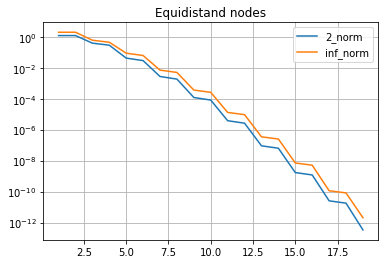

In [40]:
# Problem 1 B)
# TODO: Check that find_inf_norm_error and find_2_norm_error is correct.
#x- compute approximations
#x- make a plot of the estimated error as a function of n (one for each function)
# - can you find an error bound for cos(2pix) and plot the error bound as a function of n
#   - compare with the numerical evidence
# - "some specifications of plot"

def show_interpolation_errors(x:np.ndarray, error_2_norm:np.ndarray, error_inf_norm:np.ndarray, title:str):
    plt.plot(x, error_2_norm, label="2_norm")
    plt.plot(x, error_inf_norm, label="inf_norm")
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.semilogy()
    plt.show()

def find_inf_norm_error(func, x, y):
    return max(abs(func(x)-y))

def find_2_norm_error(func, x, y, a, b, N):
    return math.sqrt(b-a)/math.sqrt(N) * math.sqrt((np.sum((func(x)-y)**2)))


f1 = lambda x: np.cos(2*np.pi*x)
f2 = lambda x: np.e**(3*x)*np.sin(2*x)

error_inf_norm = []
error_2_norm = []

for nodes in range(1, 20):
    N = 100*nodes

    a, b = 0, 1
    x_nodes = np.linspace(a, b, nodes)
    x = np.linspace(a, b, N)
    y = get_interpolated_values(x_nodes, f1(x_nodes), x)
    error_inf_norm.append(find_inf_norm_error(f1, x, y))
    error_2_norm.append(find_2_norm_error(f1, x, y, a, b, N))
show_interpolation_errors(np.array([x for x in range(1, 20)]), np.array(error_2_norm), np.array(error_inf_norm), "Equidistand nodes")


[-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816] -1.0 0.0
(10,) (10,) (25,)
[0.02040816 0.06122449 0.10204082 0.14285714 0.18367347 0.2244898
 0.26530612 0.30612245 0.34693878 0.3877551  0.42857143 0.46938776
 0.51020408 0.55102041 0.59183673 0.63265306 0.67346939 0.71428571
 0.75510204 0.79591837 0.83673469 0.87755102 0.91836735 0.95918367
 1.        ] 0.0 1.0
(10,) (10,) (25,)


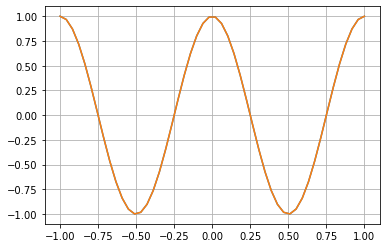

In [70]:
# Problem 1C)
def get_piecewise_interpolated_values(a:float, b:float, func, x, K, n):
    # TODO: K+1?
    sub_intervals = np.linspace(a, b, K)
    interpolated_values = []
    for start in range(sub_intervals.shape[0]-1):
        # TODO: n+1?
        x_int = np.linspace(sub_intervals[start], sub_intervals[start+1], n)
        if start==sub_intervals.shape[0]-2:
            elem_in_range = np.where(np.logical_and(sub_intervals[start]<= x, x<=sub_intervals[start+1]))[0]
        else:
            elem_in_range = np.where(np.logical_and(sub_intervals[start]<= x, x<sub_intervals[start+1]))[0]
        print(x[elem_in_range], sub_intervals[start], sub_intervals[start+1])
        print(x_int.shape, func(x_int).shape, x[elem_in_range].shape)
        interpolated_values.extend(
            get_interpolated_values(x_int, func(x_int), x[elem_in_range])
        )

    return interpolated_values


interpolated_values = get_piecewise_interpolated_values(-1, 1, f1, np.linspace(-1, 1, 50), 5, 10)

plt.plot(np.linspace(-1, 1, 50), interpolated_values)
plt.plot(np.linspace(-1, 1, 50), f1(np.linspace(-1, 1, 50)))
plt.grid()
plt.show()


